In [59]:
import pandas as pd 

excel_path_and_filename = "../../../Downloads/SMEs_Scopus_2013-2017.xlsx"

rawDF = pd.read_excel(excel_path_and_filename)
df = rawDF[['Author Keywords', 'Year', 'Abstract', 'Index Keywords']].copy()

In [102]:
from nltk.stem import WordNetLemmatizer
def filtering_abstract(i_S):
    """lower, strip, lemmatizeing? remove sp char
    """
    def replace_sp_chr(input_s):
        return "".join(map(lambda c: c if c.isalpha() else " ", input_s)).strip()
    def remove_double_space(input_s):
        while "  " in input_s:
            input_s = input_s.replace("  ", " ")
        return input_s.strip()
    r_S = i_S.copy().apply(lambda s: s.lower().strip())
    r_S = r_S.apply(lambda s: "" if s == '[No abstract available]' else s)
    r_S = r_S.apply(lambda s: remove_double_space(replace_sp_chr(s)))
    """singularize??"""
    """lemmatizing"""
    lemmatizer = WordNetLemmatizer()
    r_S = r_S.apply(lambda s: " ".join([lemmatizer.lemmatize(w) for w in s.split(" ")]) )
    return r_S
print(df['Abstract'].head(5))
print(filtering_abstract(df['Abstract']).head(5))

0    This research paper is to evaluate and present...
1    According to the application requirements of t...
2    This paper reviews the current status of high ...
3    This study shows a low-priced information coll...
4    The proceedings contain 37 papers. The topics ...
Name: Abstract, dtype: object
0    this research paper is to evaluate and present...
1    according to the application requirement of th...
2    this paper review the current status of high t...
3    this study show a low priced information colle...
4    the proceeding contain paper the topic discuss...
Name: Abstract, dtype: object


In [110]:
"""
make document frequency distribution
"""
import matplotlib.pyplot as plt 

def make_document_frequency_dist(i_S):
    df_dict = {}
    for s in i_S:
        ws = set(s.split(" "))
        for w in ws:
            if w in df_dict.keys():
                df_dict[w]+=1
            else:
                df_dict[w]=1
    """box plot and just plot 
    """
    """
    f, axes = plt.subplots(1, 2, sharex=False, sharey=False)
    f.set_size_inches((16, 4)) 
    ## box plot
    ## sorted plot 
    axes[1].plot(sorted(df_dict.values()))
    axes[1].set_title("axe {}".format(i))
    #plt.savefig('../../assets/images/markdown_img/pl_subplot_180515.svg')
    plt.show()
    """
    
    return df_dict.values()
make_document_frequency_dist(filtering_abstract(df['Abstract'][:10]))

dict_values([2, 1, 1, 1, 4, 5, 3, 10, 10, 1, 5, 5, 1, 1, 1, 1, 8, 2, 2, 3, 1, 1, 1, 1, 4, 4, 2, 2, 10, 5, 1, 1, 4, 2, 1, 2, 1, 3, 4, 1, 10, 1, 10, 3, 6, 1, 1, 1, 3, 9, 9, 7, 2, 5, 6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 4, 2, 1, 3, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 4, 3, 1, 4, 1, 2, 2, 2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 4, 1, 3, 1, 2, 1, 1, 3, 1, 6, 1, 5, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 8, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 6, 1, 1, 3, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 2, 2, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2

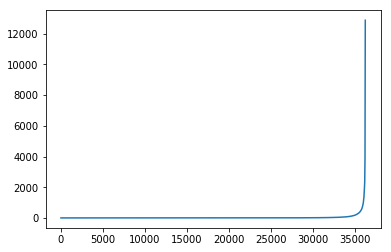

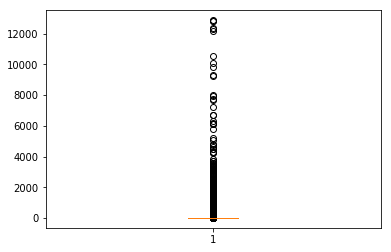

In [119]:
a = make_document_frequency_dist(filtering_abstract(df['Abstract']))
plt.plot(list(sorted(a)))
plt.show()
plt.boxplot(list(a))
plt.show()

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
def make_tfidf_df(sent_lst):
    TFIDFmodel = TfidfVectorizer(
        ngram_range=(2, 4), # 앞 뒤 window를 고려하여 확장된 형태로 제시해줌. phrase를 뽑아낼 수 있는 강점이 있기는 할듯. 
        min_df = 0.1, # document freqeuency 가 min_df 이상은 되는 키워드만으로 vocabulary를 구성
        max_df = 0.3,# document frequency가 10 이하인 키워드만으로 vocabulary를 구성 
        binary = False # binary이면 있다 없다 구조로 변경됨
    )
    TFIDFmodel.fit(sent_lst)
    return TFIDFmodel.vocabulary_, pd.DataFrame(TFIDFmodel.transform(sent_lst).toarray(),
             columns = [it[0] for it in sorted(TFIDFmodel.vocabulary_.items(), key=lambda x: x[1])])
#print(df['Abstract'].head(10))
abs_series = filtering_abstract(df['Abstract'])
abs_vocab, abs_tfidf_df = make_tfidf_df(abs_series.head(100))
"""
abs_vocal는 word: count 로 구성된 딕셔너리 타입, 
그러나, 얘가 딱히 카운트로 정렬되어 있지는 않음. 
"""
print(abs_vocab)
#print(abs_tfidf_df)
"""using tsne and clustering, 우선 tsne를 통해서 이차원 공간에서 군집화가 되는지를 확인이 되어야 함. 
육안으로 어느 정도 선명한 선이 있다면, 클러스터링하는 것이 유의미하고, 그렇지 않을 경우에는 유의미하지 못하다고 할 수 있을 것 같음. 

우선 여기서 중요한 것이, min_df, max_df를 잘 잡아서 tfidf를 만들어야 하는데, 
이렇게 해서 클러스터링이 잘되었는지를 대략 시각적으로 파악할 수 있음. 
"""

{'this research': 60, 'paper is': 34, 'is to': 23, 'the result': 57, 'from the': 16, 'medium enterprise': 25, 'in smes': 19, 'based on': 7, 'smes and': 45, 'and the': 6, 'study is': 47, 'by the': 9, 'and medium enterprise': 2, 'medium enterprise smes': 26, 'small and medium enterprise': 43, 'and medium enterprise smes': 3, 'result of': 38, 'show that': 40, 'can be': 10, 'all right': 0, 'right reserved': 39, 'all right reserved': 1, 'this paper': 59, 'in this': 20, 'for the': 15, 'this study': 61, 'in order': 17, 'order to': 33, 'the main': 51, 'in order to': 18, 'of smes': 31, 'type of': 63, 'to be': 62, 'the study': 58, 'with the': 64, 'of small': 30, 'the author': 49, 'based on the': 8, 'the purpose': 52, 'purpose of': 35, 'of this': 32, 'the relationship': 55, 'relationship between': 37, 'medium sized': 27, 'sized enterprise': 41, 'smes in': 46, 'focus on': 13, 'the purpose of': 53, 'purpose of this': 36, 'and medium sized': 4, 'medium sized enterprise': 28, 'the purpose of this': 5

'using tsne and clustering, 우선 tsne를 통해서 이차원 공간에서 군집화가 되는지를 확인이 되어야 함. \n육안으로 어느 정도 선명한 선이 있다면, 클러스터링하는 것이 유의미하고, 그렇지 않을 경우에는 유의미하지 못하다고 할 수 있을 것 같음. \n\n우선 여기서 중요한 것이, min_df, max_df를 잘 잡아서 tfidf를 만들어야 하는데, \n이렇게 해서 클러스터링이 잘되었는지를 대략 시각적으로 파악할 수 있음. \n'

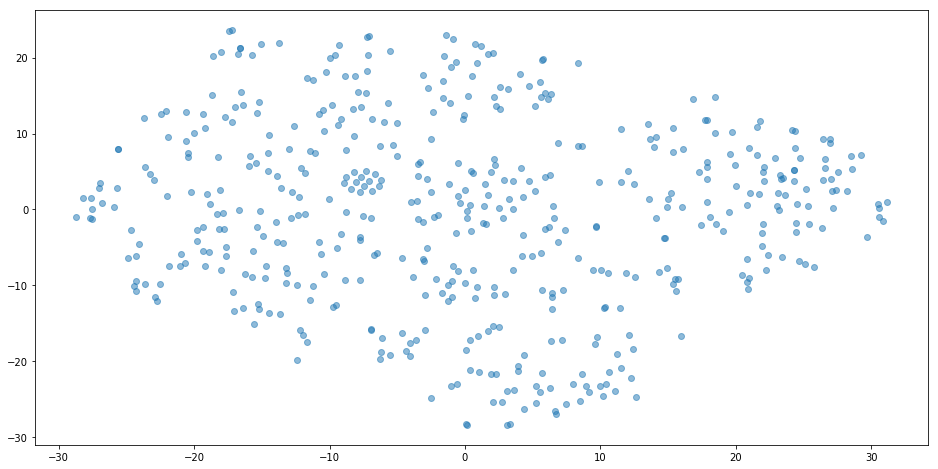

In [98]:


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

abs_vocab, abs_tfidf_df = make_tfidf_df(abs_series[:500])
new_X = TSNE(n_components=2).fit_transform(abs_tfidf_df)

plt.figure(figsize=(16, 8))
plt.scatter(new_X[:, 0], new_X[:, 1], alpha=0.5)
#plt.savefig()
plt.show()

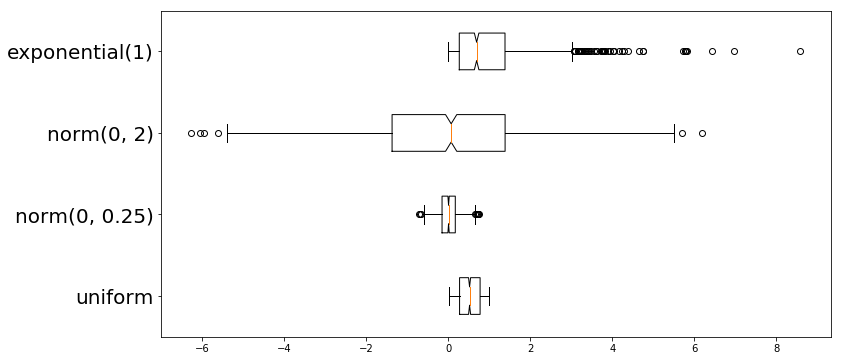

In [187]:
## boxplot 해보기
import numpy as np 

plt.figure(figsize=(12, 6))
sample_size = 1000

dist_dict = {
    "uniform":[np.random.uniform() for i in range(0, sample_size)], 
    "norm({}, {})".format(0, 0.25): [np.random.normal(0, 0.25) for i in range(0, sample_size)], 
    "norm({}, {})".format(0, 2): [np.random.normal(0,2) for i in range(0, sample_size)], 
    "exponential({})".format(1): [np.random.exponential(1) for i in range(0, sample_size)], 
}

plt.boxplot(
    list(dist_dict.values()),
    vert=False, 
    notch=True # if it is False, it will be box
           )
plt.gca().set_yticklabels(dist_dict.keys(),
                          rotation=0, fontsize=20)
plt.savefig('../../assets/images/markdown_img/boxplot_20180516')
